## PCA using SciKit Learn

In [1]:
# Loading the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Reading the file
mnist=pd.read_csv('/Users/jayraj/Applied_AI_Course/Applied_ai_course/Datasets/digit-recognizer/mnist_train.csv')
mnist

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
labels=mnist.label
labels

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [13]:
data=mnist.drop('label', axis=1)
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
print(data.shape)
print(labels.shape)

(42000, 784)
(42000,)


In [16]:
# Data preprocessing: Standardizating the data (Column standardization)
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)
print(standardized_data.shape)

(42000, 784)


In [17]:
# Changing the name
data=standardized_data

In [18]:
# Initializing PCA
from sklearn import decomposition
pca=decomposition.PCA()

In [20]:
# Configuring the parameters
# Setting number of components = 2

pca.n_components =2
pca_data=pca.fit_transform(data)

# pca reduced will contain the 2-D projects of simple data
print("shape of pca_reduced.shape= ", pca_data.shape)

shape of pca_reduced.shape=  (42000, 2)


In [25]:
# Attaching the label for each 2-D data point
pca_data=np.vstack((pca_data.T, labels)).T
pca_data.shape

(42000, 4)

In [23]:
# Creating the new data frame which help us in plotting the result data
pca_dataframe=pd.DataFrame(data=pca_data, columns=('first_principle', 'second_principle', 'labels'))
print(pca_dataframe.head())

   first_principle  second_principle  labels
0        -5.140387         -5.226787     1.0
1        19.292303          6.033073     0.0
2        -7.644540         -1.705619     1.0
3        -0.474307          5.836346     4.0
4        26.559540          6.024926     0.0


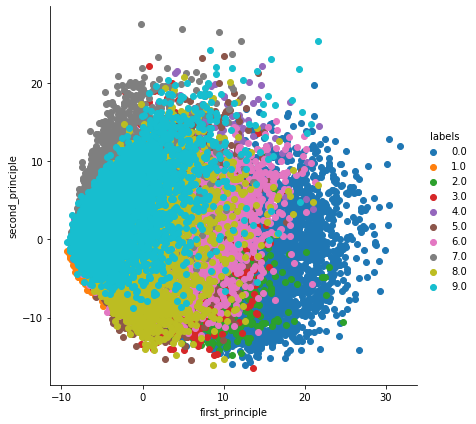

In [24]:
import seaborn as sns
sns.FacetGrid(pca_dataframe, hue='labels', height=6).map(plt.scatter, 'first_principle', 'second_principle').add_legend()
plt.show()